In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import joblib
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE
import matplotlib.cm as cm
import seaborn as sns
from sklearn import preprocessing

In [44]:
def get_top_keywords(n_terms, clusters):
    df = pd.DataFrame(X).groupby(clusters).mean()
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(' '.join([terms[t] for t in np.argsort(r)[-n_terms:]]))

In [45]:
def plot_reduced(df, x0, x1, clusters, name_map, title):
  df['cluster'] = clusters
  df['cluster'] = X['cluster'].map(name_map)
  df['x0'] = x0
  df['x1'] = x1

  palette_colors = ['purple', 'turquoise', 'orange']
  palette = {key: palette_colors[i] for i, key in enumerate(name_map.values())}

  plt.figure(figsize=(10, 7))
  plt.title(title, fontdict={"fontsize": 18})
  sns.scatterplot(data=df, x='x0', y='x1', hue='cluster', palette=palette)
  plt.show()

  df.drop(['cluster', 'x0', 'x1'], axis=1, inplace=True)

In [46]:
def plot_3d(df, x, y, z, clusters):
  df['cluster'] = clusters
  df['x'] = x
  df['y'] = y
  df['z'] = z

  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')

  scatter = ax.scatter(df['x'], df['y'], df['z'], c=df['cluster'], cmap='viridis')
  colorbar = plt.colorbar(scatter)
  plt.show()

  df.drop(['cluster', 'x', 'y', 'z'], axis=1, inplace=True)

In [47]:
def plot_metrics(K, inertias, silhouettes):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

  ax1.plot(K, inertias, 'rx-')
  ax1.set_xlabel('Values of K')
  ax1.set_ylabel('Inertia')
  ax1.set_title('Inertia')

  ax2.plot(K, silhouettes, 'bx-')
  ax2.set_xlabel('Values of K')
  ax2.set_ylabel('Silhouettes')
  ax2.set_title('Silhouettes')

  plt.tight_layout()
  plt.show()

In [77]:
def plot_iterations(df, reduced_matrix):

  inertias = []
  silhouettes = []
  clusters = []
  K = range(2, 10)

  best_silhouette = 0
  best_model = 0

  fig, axs = plt.subplots(4, 2, figsize=(10, 12))

  for i, k in enumerate(K):

    row = i // 2
    col = i % 2

    kmeans = KMeans(n_clusters=k, init='k-means++', n_init = 10)
    y_kmeans = kmeans.fit_predict(df)

    ax = axs[row, col]
    ax.scatter(reduced_matrix[:, 0], reduced_matrix[:, 1], c=y_kmeans)
    if not isinstance(df, pd.DataFrame):
      ax.scatter(kmeans.cluster_centers_[:, 0],
                kmeans.cluster_centers_[:, 1],
                s=70, c='red', marker='x')
    ax.set_title('(k={})'.format(k))

    current_silhouette = silhouette_score(lsa_matrix, kmeans.labels_)
    inertias.append(kmeans.inertia_)
    silhouettes.append(current_silhouette)
    clusters.append(y_kmeans)

    if current_silhouette > best_silhouette:
      best_silhouette = current_silhouette
      best_model = kmeans

    ax.text(0.05, 0.95,
            'Inertia: {:.2f}\nSilhouette: {:.2f}'.format(inertias[i], silhouettes[i]),
            verticalalignment='top',
            horizontalalignment='left',
            transform=ax.transAxes,
            fontsize=10,
            bbox={'facecolor': 'white', 'alpha': 0.7, 'pad': 5})

  plt.tight_layout()
  plt.show()
  return K, inertias, silhouettes, clusters, best_model

In [49]:
data = pd.read_csv('../pretprocesiranje/cluster_data.csv')

In [50]:
terms = data.columns.tolist()

#**KMeans**

kmeans sa 3 klastera jer znamo da imamo 3 klase :) pa smenjanja dimenzionalnosti da bismo vizualizovali cisto da vidimo kako su rasporedjeni

In [51]:
X = data.copy()

In [52]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
clusters = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [53]:
get_top_keywords(10, clusters)


Cluster 0
phd magic youtube degree cream ice mushroom chemistry physic look

Cluster 1
effect research year sense solution science electron matter make thing

Cluster 2
sidebar hell physicsmemes mod username question explain stop check please


In [54]:
cluster_map = {0: "biology", 1: "chemistry", 2: "physics"}

#kmeans + PCA

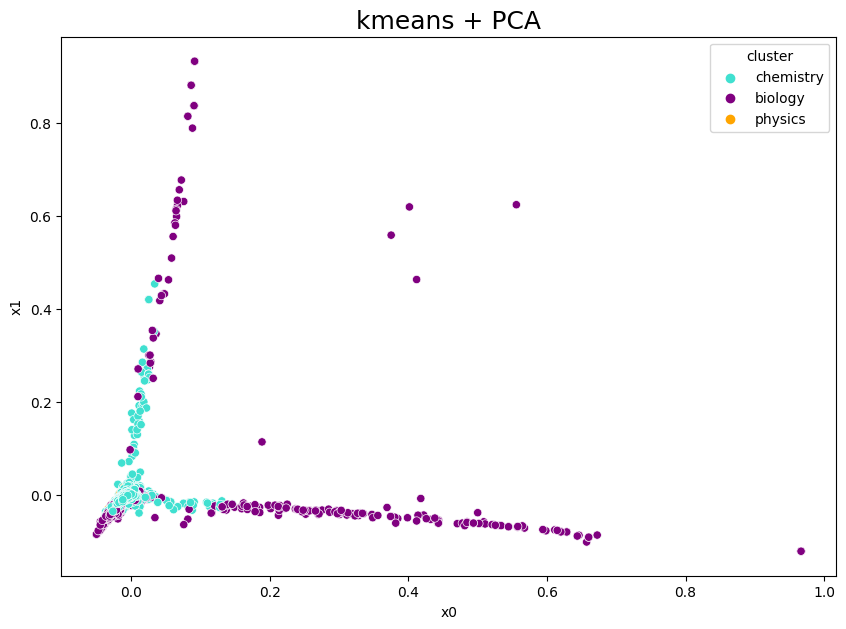

In [55]:
pca = PCA(n_components=2, random_state=42)
pca_vecs = pca.fit_transform(X.values)
x0, x1 = pca_vecs[:, 0], pca_vecs[:, 1]
plot_reduced(X, x0, x1, clusters, cluster_map, "kmeans + PCA")

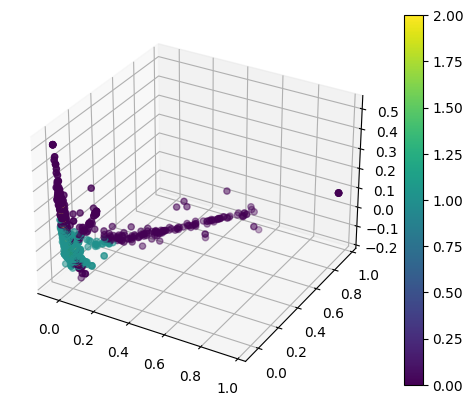

In [56]:
pca = PCA(n_components=3, random_state=42)
pca_vecs = pca.fit_transform(X.values)
x, y, z = pca_vecs[:, 0], pca_vecs[:, 0], pca_vecs[:, 2]
plot_3d(X, x, y, z, clusters)

# kmeans + LSA

za smanjenje dimenzionalnosti teksta se obicno koristi lsa, a ne pca

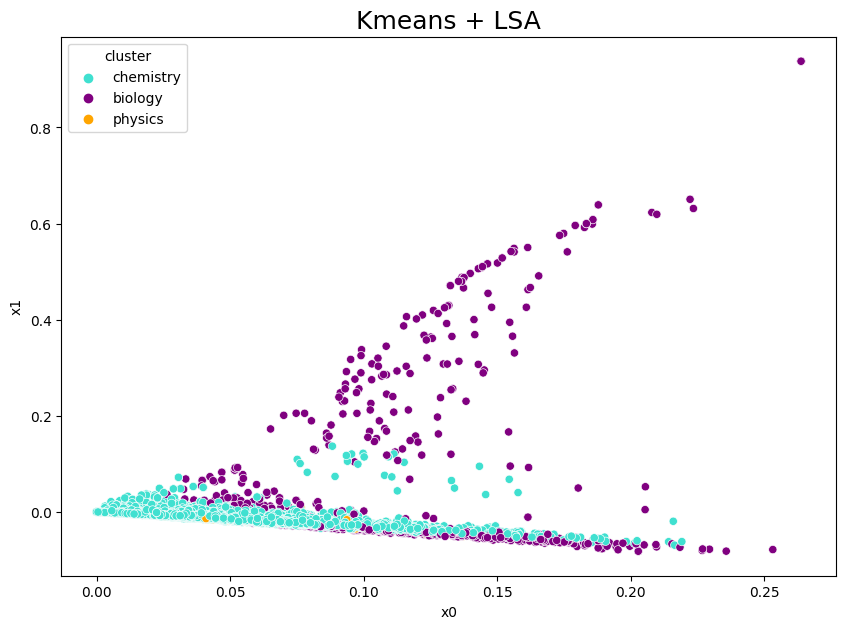

In [57]:
lsa = TruncatedSVD(n_components=2, random_state=42)
lsa_matrix = lsa.fit_transform(X)
x0, x1 = lsa_matrix[:, 0], lsa_matrix[:, 1]
plot_reduced(X, x0, x1, clusters, cluster_map, "Kmeans + LSA")

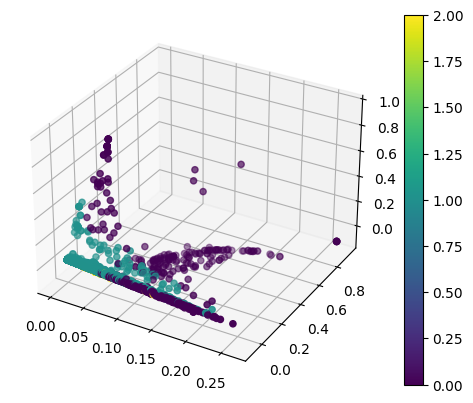

In [58]:
lsa = TruncatedSVD(n_components=3, random_state=42)
lsa_matrix = lsa.fit_transform(X)
x, y, z = lsa_matrix[:, 0], lsa_matrix[:, 1], lsa_matrix[:, 2]
plot_3d(X, x, y, z, clusters)

#Prikaz pravih klasa

In [59]:
train = pd.read_csv('../pretprocesiranje/train_data.csv')
test = pd.read_csv('../pretprocesiranje/test_data.csv')

In [60]:
combined_df = pd.concat([train, test], axis=0)
combined_df.reset_index(drop=True, inplace=True)

In [61]:
clusters = combined_df['0']

In [62]:
lsa = TruncatedSVD(n_components=2, random_state=42)
lsa_matrix = lsa.fit_transform(X)
x0, x1 = lsa_matrix[:, 0], lsa_matrix[:, 1]
cluster_map = {0: "biology", 1: "chemistry", 2: "physics"}

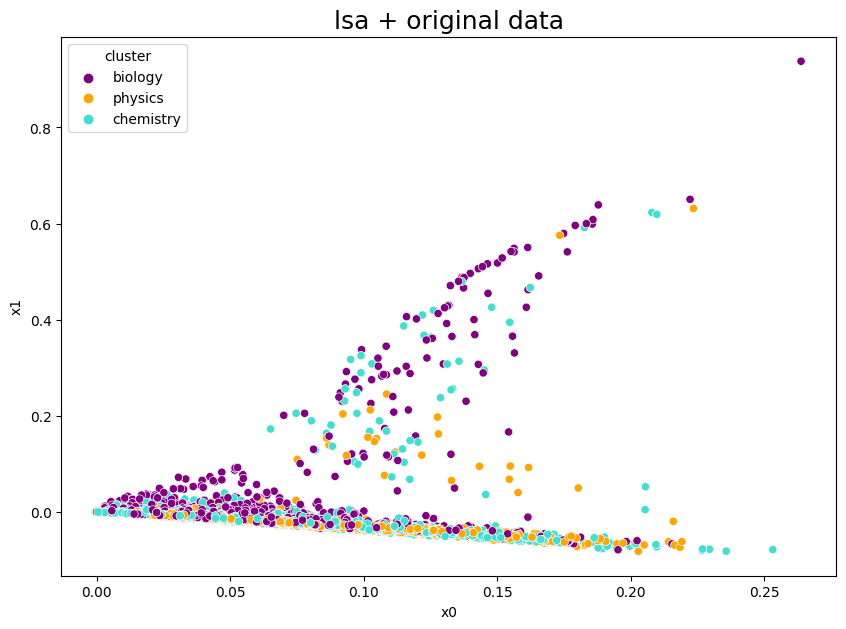

In [63]:
plot_reduced(X, x0, x1, clusters, cluster_map, "lsa + original data")

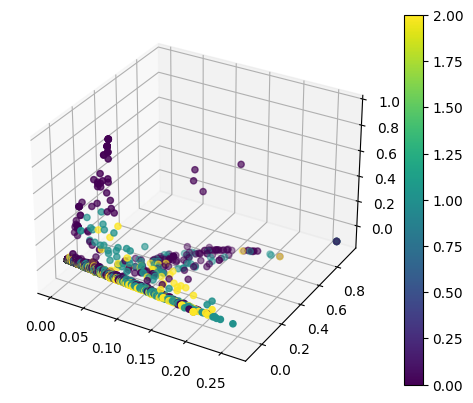

In [64]:
lsa = TruncatedSVD(n_components=3, random_state=42)
lsa_matrix = lsa.fit_transform(X)
x, y, z = lsa_matrix[:, 0], lsa_matrix[:, 1], lsa_matrix[:, 2]
plot_3d(X, x, y, z, clusters)

#Trazenje optimalnog broja klastera na redukovanim podacima

In [65]:
lsa = TruncatedSVD(n_components=2, random_state=42)
lsa_matrix = lsa.fit_transform(X)

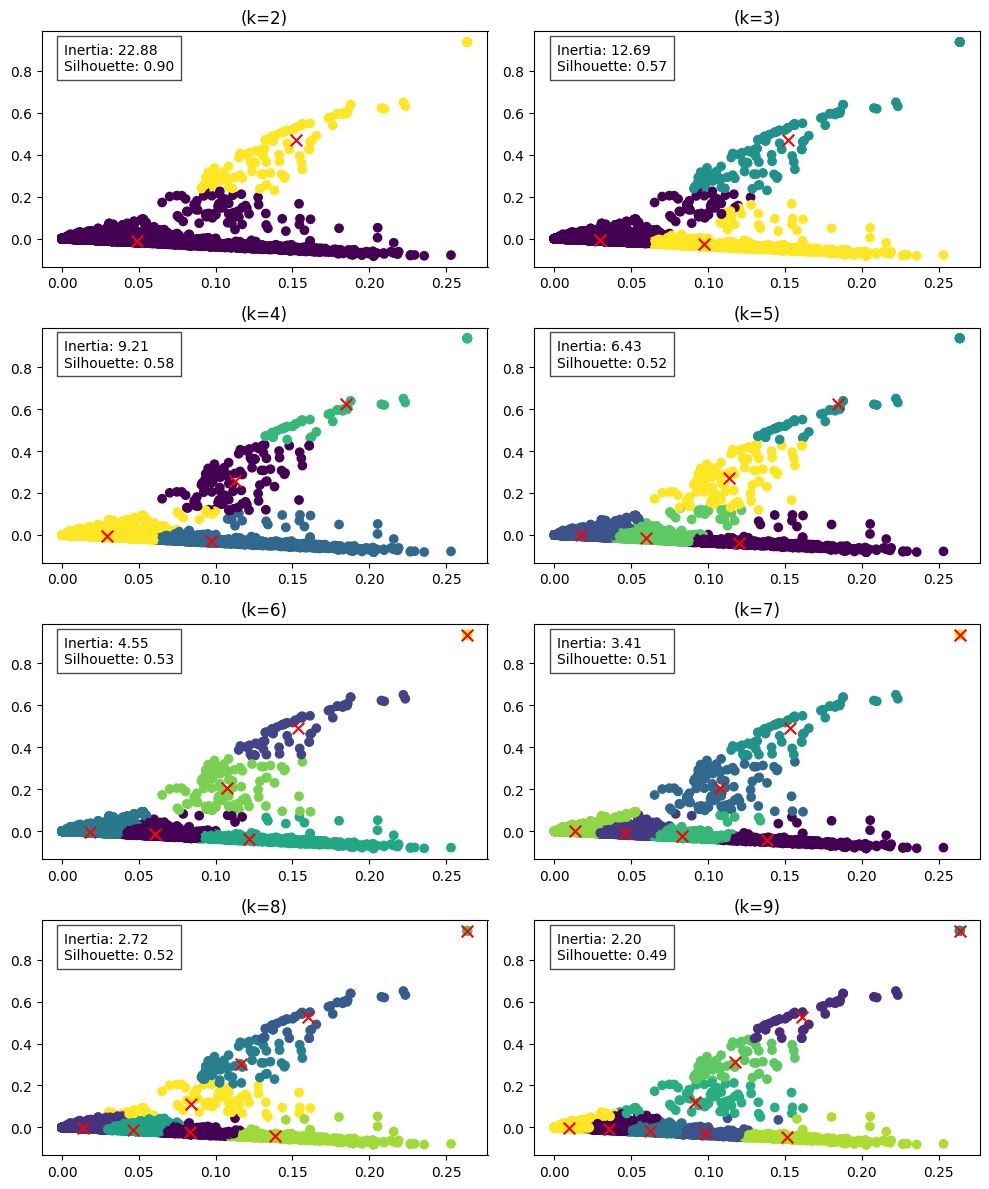

In [66]:
K, inertias, silhouettes, clusters = plot_iterations(lsa_matrix, lsa_matrix)

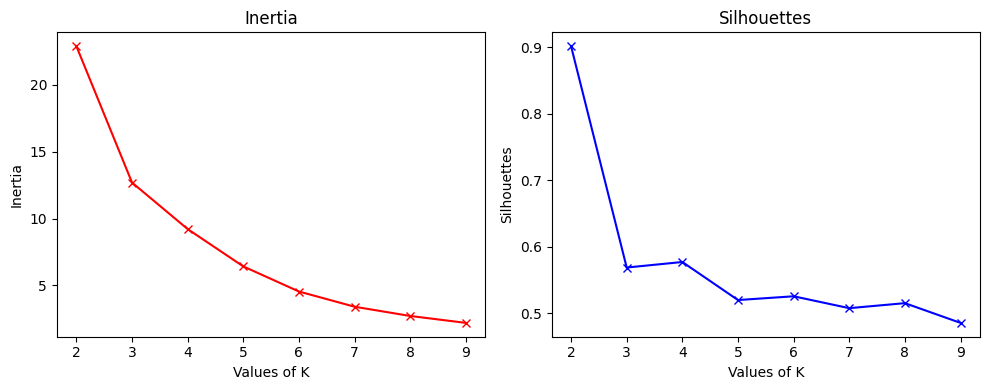

In [67]:
plot_metrics(K, inertias, silhouettes)

najbolji rez za 2,3,4

In [68]:
for cluster in clusters:
  get_top_keywords(10, cluster)
  print('------------------------------------------------------------------------------')


Cluster 0
biology electromagnetism yea requisite matt sci majority chemistry thin phys

Cluster 1
friendly hunger character ibuprofen kind muscle jumping crc assassin longest
------------------------------------------------------------------------------

Cluster 0
sore shirt football kidney mammalian flux assassin pleasant ibuprofen muscle

Cluster 1
friendly hunger character ibuprofen kind muscle jumping crc assassin longest

Cluster 2
biology sensation matt yea requisite sci majority thin chemistry phys
------------------------------------------------------------------------------

Cluster 0
flux ibuprofen oral friendly chromate turkey crew picking colony longest

Cluster 1
biology sensation matt yea requisite sci majority thin chemistry phys

Cluster 2
chaga kind dcm dedicated spherical july hunger character assassin longest

Cluster 3
sore shirt football kidney mammalian flux assassin pleasant ibuprofen muscle
-----------------------------------------------------------------------

#Bez transformacija

In [69]:
lsa = TruncatedSVD(n_components=2, random_state=42)
lsa_matrix = lsa.fit_transform(X)

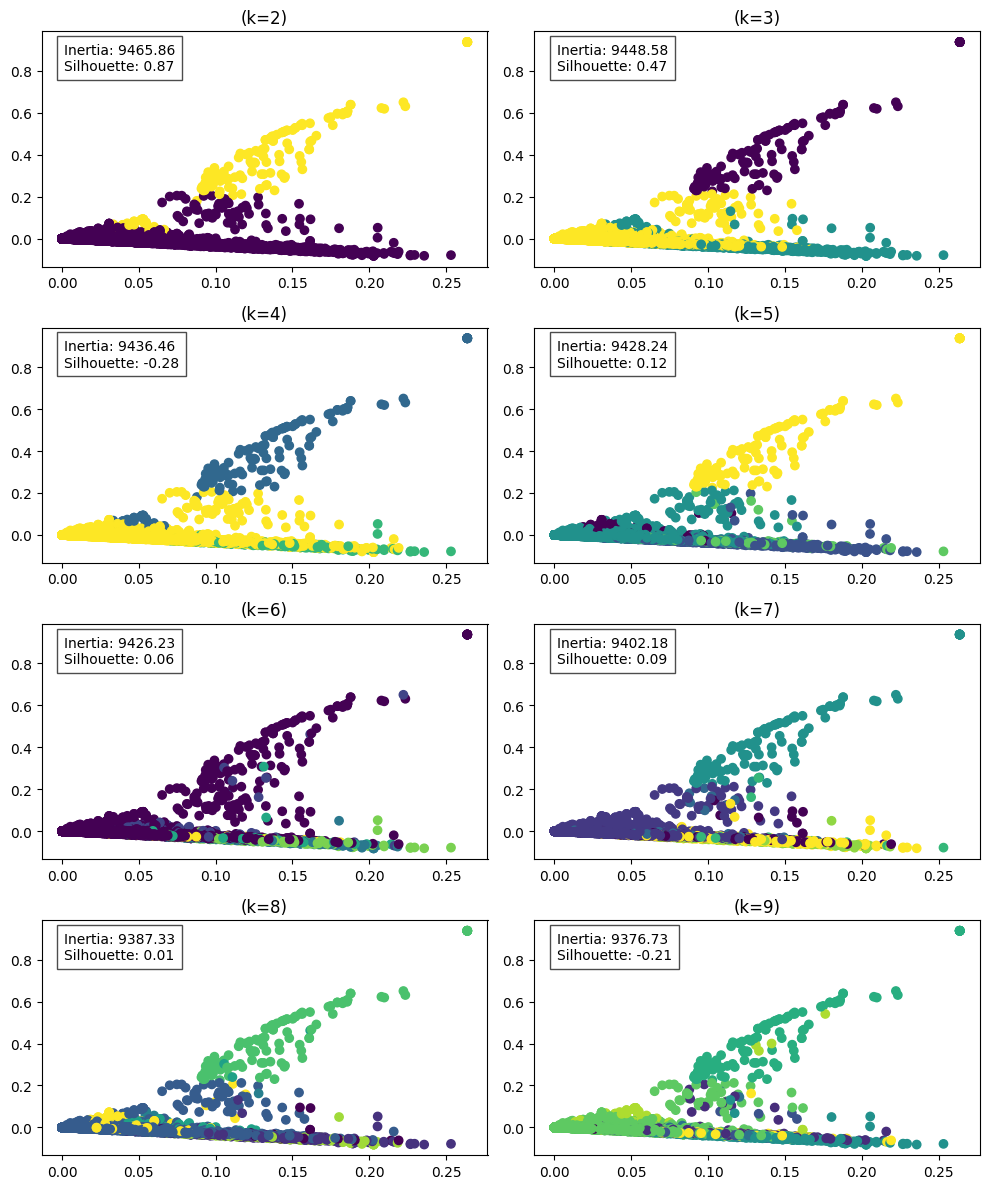

In [78]:
K, inertias, silhouettes, clusters, best_model = plot_iterations(X, lsa_matrix)

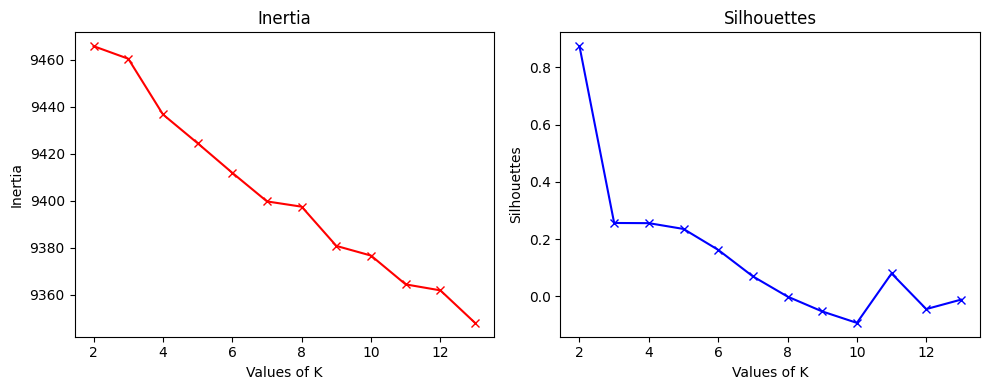

In [76]:
plot_metrics(K, inertias, silhouettes)

najbolje za k = 2

In [80]:
best_model

KMeans(n_clusters=2, n_init=10)

In [81]:
joblib.dump(best_model, 'kmeans_model.joblib')

['kmeans_model.joblib']